In [1]:
# from google.colab import drive
from datetime import datetime
import numpy as np
import warnings
import pandas_datareader as web

# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

import pandas as pd
import matplotlib.pyplot as plt
import math
import mplfinance as mpf
import os

In [2]:
df = web.DataReader('^TWII', data_source= 'yahoo', start = '2009-01-01', end = '2021-06-20')
n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

Close=df['Close'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:] 


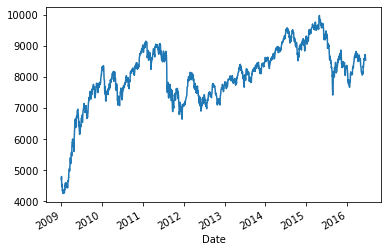

In [3]:
df_train['Close'].plot()
plt.show()

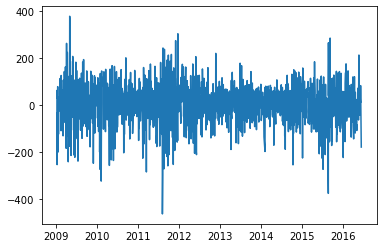

In [4]:
plt.plot(df_train['Close'].diff())

<function matplotlib.pyplot.show(*args, **kw)>

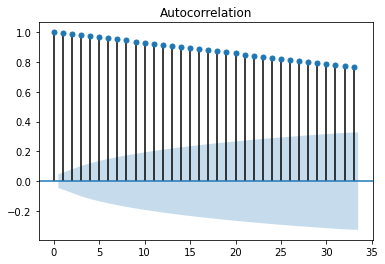

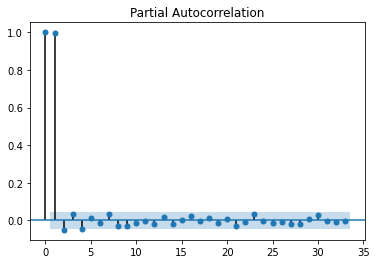

In [5]:
plot_acf(df_train['Close'])
plot_pacf(df_train['Close'])
plt.show

In [6]:

df = web.DataReader('^TWII', data_source= 'yahoo', start = '2018-01-01', end = '2020-06-20')
# Get training data (timely ordered since data is time-series)
n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

Close=df['Close'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:]

In [7]:
history=[x for x in train_close]
preds=[]
for i in range(len(test_close)):
    model = ARIMA(history, order=(3, 1, 5))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    preds.append(pred)
    history.append(test_close[i])

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum

In [8]:
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test_close, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 218.522


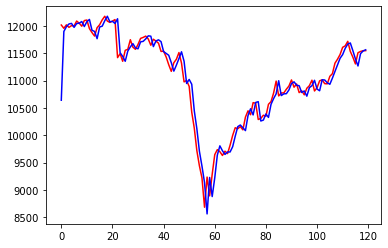

In [9]:
plt.plot(test_close, color='red')
plt.plot(preds, color='blue')